In [21]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [22]:
# use the Iris dataset from scikit-learn:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [23]:
#  Calculate entropy
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


In [24]:
#  Calculate Information Gain

def information_gain(X, y, feature_index, threshold):
    total_entropy = entropy(y)
    
    # Split the dataset based on the threshold value
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    y_left, y_right = y[left_mask], y[right_mask]
    
    # Calculate the weighted average of the entropies of the two child nodes
    left_entropy = entropy(y_left)
    right_entropy = entropy(y_right)
    n_left, n_right = len(y_left), len(y_right)
    child_entropy = (n_left * left_entropy + n_right * right_entropy) / (n_left + n_right)
    
    # Calculate the information gain
    information_gain = total_entropy - child_entropy
    return information_gain


In [25]:
# Fitting datas
clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

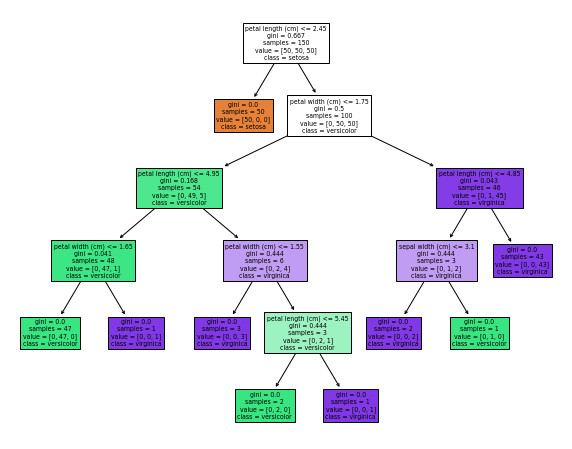

In [26]:
#Visualization
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
